In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import math

In [2]:
#Loading the data
M = loadmat("/content/drive/MyDrive/ECS271 - Machine Learning & Discovery/Assignments/MNIST_digit_data (1).mat")
images_train,images_test,labels_train,labels_test= M['images_train'],M['images_test'],M['labels_train'],M['labels_test']

#randomly permute data points
inds = np.random.permutation(images_train.shape[0])
images_train = images_train[inds]
labels_train = labels_train[inds]

inds = np.random.permutation(images_test.shape[0])
images_test = images_test[inds]
labels_test = labels_test[inds]

Initializing the weights<sup>[1]</sup>

In [3]:
def set_weights(images):
  _, n_inputs = images.shape
  W = np.random.uniform(size=(784,10), high=(1.0/math.sqrt(n_inputs)), low=-(1.0/math.sqrt(n_inputs)))
  return W

Softmax implementation<sup>[2]</sup>

In [4]:
def softmax(x):
  return(np.exp(x-np.max(x))/np.exp(x-np.max(x)).sum())

def ohe(x):
  res = np.zeros((1,10))
  res[0][int(x)] = 1
  return res[0]

In [84]:
def test_model():
  acc_test = []
  cor = 0
  for i in range(len(images_test)):
    linear = np.dot(images_test[i],W)
    linear = softmax(linear)

    if np.where(linear == max(linear))[0][0] == labels_test[i][0]:
      cor+=1
  acc_test = (cor/len(images_test))*100
  return acc_test

In [102]:
def train_model(images, labels, weights, batch_size, iterations, alpha, test):
  soft_layer = []
  batch_loss = []
  acc = []
  acc_final = []
  cor = 0

  X = []

  for i in range(iterations):
    cor=0
    for j in range(len(images)):
      if j!=0 and j % (batch_size) == 0:
        X = np.array(X)
        batch_loss = np.array(batch_loss)
        grad_loss = np.dot(X.T,batch_loss)
        weights -= (alpha*grad_loss)
        batch_loss = []
        X = []
        if test and j % 100 == 0:
          test_acc = test_model()
          acc_final.append(test_acc)

      X.append(images[j])
      soft_layer = softmax(np.dot(images[j],weights))
      Y_ohe = ohe(labels[j])
      batch_loss.append(soft_layer-Y_ohe)

      if np.where(soft_layer == max(soft_layer))[0][0] == labels[j][0]:
        cor += 1
    acc.append((cor/len(images))*100)
  return acc_final


# 1) 


In [140]:
W = set_weights(images_train)
output = train_model(images_train, labels_train, W, 10, 1, 0.01, True)

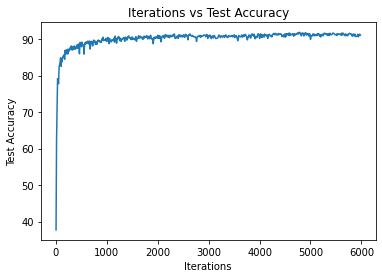

In [142]:
x_axis = [i for i in range(1,5990,10)]

plt.plot(x_axis, output)
plt.title('Iterations vs Test Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Test Accuracy')
plt.show()

# 2)

Implementation of Sort_tuple similar to <sup>[3]</sup>

In [7]:
def Sort_Tuple(tup):
    return(sorted(tup, key = lambda x: x[1], reverse=True)) 

In [42]:
def misclassified():
  classes = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[]}
  for i in range(len(images_test)):
    linear = np.dot(images_test[i],W)
    linear = softmax(linear)
    if np.where(linear == max(linear))[0][0] != labels_test[i][0]:
      classes[np.argmax(linear)].append((i, max(linear), np.argmax(linear)))
  return classes

In [43]:
wrong_preds = misclassified()
for i in range(10):
  s = wrong_preds[i]
  s = Sort_Tuple(s)
  wrong_preds[i] = s[:10]
                    

In [44]:
img_arr = []
wrong_probs_flatten = []
wrong_class_flatten = []
for i in range(10):
  for j in range(10):
    img_arr.append(wrong_preds[i][j][0])
    wrong_probs_flatten.append(wrong_preds[i][j][1])
    wrong_class_flatten.append(wrong_preds[i][j][2])


Implemented grid of images with help from - <sup>[4]</sup>

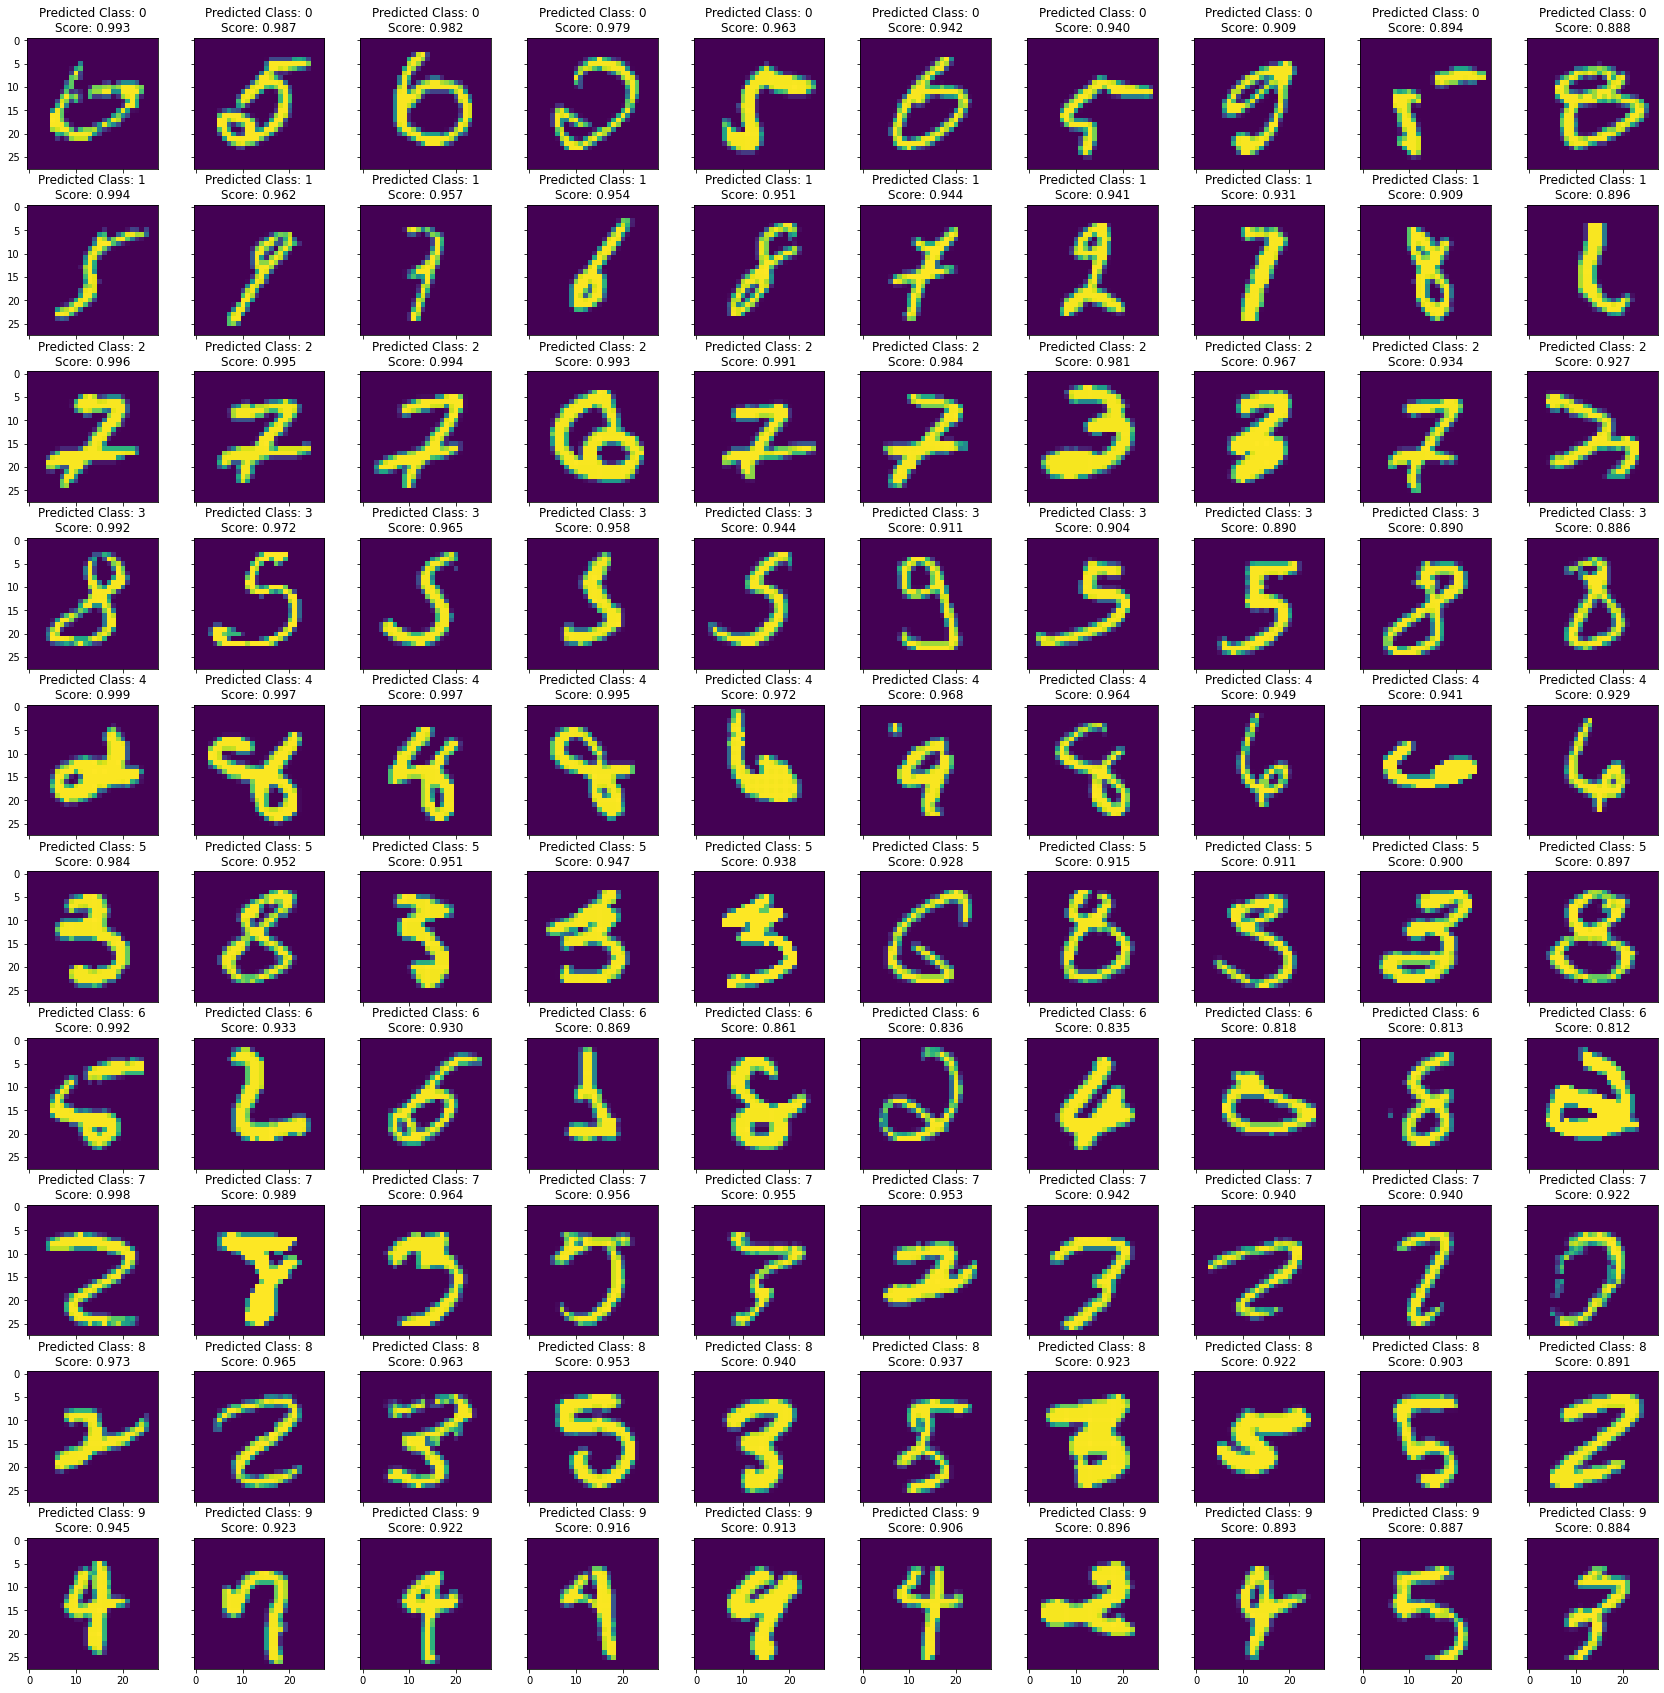

In [45]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

fig = plt.figure(figsize=(30., 30.))
grid = ImageGrid(fig, 111, nrows_ncols=(10, 10), axes_pad=0.5,)

for idx, (ax, im) in enumerate(zip(grid, img_arr)):
    img = images_test[im,:].reshape((28,28),order='F')
    ax.imshow(img)
    ax.set_title('Predicted Class: {s}\nScore: {f:.3f}'.format(s=str(wrong_class_flatten[idx]), f=wrong_probs_flatten[idx]))
    
plt.show()

# 3)

In [97]:
sample_images = []
sample_labels = []
seen = set()

for i in range(len(images_train)):
  if list(labels_train[i])[0] not in seen:
    sample_images.append(images_train[i])
    sample_labels.append(labels_train[i])
    seen.add(list(labels_train[i])[0])

sample_images = np.array(sample_images)
sample_labels = np.array(sample_labels)

In [100]:
W = set_weights(sample_images)
output = train_model(sample_images, sample_labels, W, 10, 100, 0.01, True)

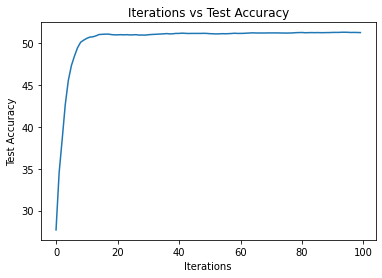

In [101]:
x_axis = [i for i in range(100)]

plt.plot(x_axis, output)
plt.title('Iterations vs Test Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Test Accuracy')
plt.show()

# 4)

In [112]:
W = set_weights(images_train)
batch_1 = train_model(images_train, labels_train, W, 1, 1, 0.01, True)
W = set_weights(images_train)
batch_10 = train_model(images_train, labels_train, W, 10, 1, 0.01, True)
W = set_weights(images_train)
batch_100 = train_model(images_train, labels_train, W, 100, 1, 0.01, True)

accs = {}
accs[1] = batch_1
accs[10] = batch_10
accs[100] = batch_100

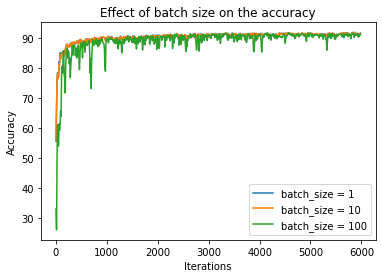

In [113]:
B = [1,10,100]

plt.title("Effect of batch size on the accuracy")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
x_axis = [i for i in range(1,5990,10)]

for i in B:
  plt.plot(x_axis, accs[i], label="batch_size = " + str(i))
  plt.legend(loc="lower right")

# 5)

In [103]:
idxs = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[]}
for i in range(len(labels_train)):
  idxs[labels_train[i][0]].append(i)

inds = []
for v in idxs.values():
  inds.extend(v)

In [104]:
sorted_imgs = images_train[inds]
sorted_labels = labels_train[inds]

In [105]:
W = set_weights(sorted_imgs)
output = train_model(sorted_imgs, sorted_labels, W, 10, 1, 0.01, True)

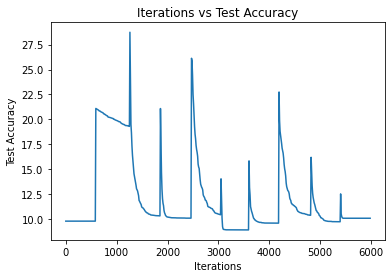

In [106]:
x_axis = [i for i in range(1,5990,10)]

plt.plot(x_axis, output)
plt.title('Iterations vs Test Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Test Accuracy')
plt.show()

# 6) Bonus question - Referred<sup>[5]</sup>

In [18]:
def ReLU(x):
  return np.maximum(x,0)

def ReLU_prime(x):
  return x>0

In [352]:
def test_hidden_model(W1, W2):
  acc_test = []
  cor = 0
  for i in range(len(images_test)):
    z1 = np.dot(images_test[i],W1)
    a1 = ReLU(z1)
    z2 = np.dot(W2.T, a1)
    a2 = softmax(np.float128(z2))

    if np.argmax(a2) == labels_test[i][0]:
      cor+=1
  acc_test = (cor/len(images_test))*100
  return acc_test

In [407]:
def train_hidden_model(images, labels, W1, W2, batch_size, iterations, alpha, test):
  A1 = []
  Z1 = []
  batch_loss = []
  acc_final = []
  n = 10

  X = []

  for i in range(iterations):
    for j in range(len(images)):
      if j!=0 and j % (batch_size) == 0:
        X = np.array(X)
        A1 = np.array(A1)
        batch_loss = np.array(batch_loss)
        dW2 = 1/n * np.dot(A1.T,batch_loss)
        W2 -= (alpha*(np.float128(dW2)))

        dA1 = np.dot(batch_loss, W2.T)
        Z1 = np.array(Z1)
        dZ1 = dA1*ReLU_prime(Z1)
        dW1 = 1/n * (np.dot(dZ1.T, X)).T

        W1 -= (alpha*(np.float128(dW1)))

        batch_loss = []
        A1=[]
        Z1=[]
        X = []

        if test and j % 100 == 0:
          test_acc = test_hidden_model(W1, W2)
          acc_final.append(test_acc)

      X.append(images[j])

      z1 = np.dot(images[j],W1)
      Z1.append(z1)
      a1 = ReLU(z1)
      A1.append(a1)

      z2 = np.dot(W2.T, a1)
      a2 = softmax(z2)

      Y_ohe = ohe(labels[j])
      batch_loss.append(a2-Y_ohe)

  return acc_final

In [408]:
W1 = np.random.uniform(size=(784,11), high=(1.0/math.sqrt(784)), low=-(1.0/math.sqrt(784)))
W2 = np.random.uniform(size=(11,10), high=(1.0/math.sqrt(11)), low=-(1.0/math.sqrt(11)))

In [409]:
output = train_hidden_model(images_train, labels_train, W1, W2, 10, 1, 0.01, True)

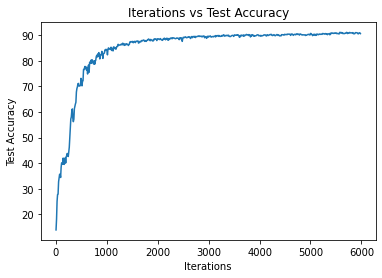

In [410]:
x_axis = [i for i in range(1,5990,10)]

plt.plot(x_axis, output)
plt.title('Iterations vs Test Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Test Accuracy')
plt.show()

# References


1.   https://machinelearningmastery.com/weight-initialization-for-deep-learning-neural-networks/
2.   https://www.sharpsightlabs.com/blog/numpy-softmax/
3. https://www.geeksforgeeks.org/python-program-to-sort-a-list-of-tuples-by-second-item/
4. https://kanoki.org/2021/05/11/show-images-in-grid-inside-jupyter-notebook-using-matplotlib-and-numpy/
5. https://youtu.be/w8yWXqWQYmU
6. https://towardsdatascience.com/derivative-of-the-softmax-function-and-the-categorical-cross-entropy-loss-ffceefc081d1
